In [5]:
import mysql.connector as cnt

In [12]:
# DB = cnt.connect(
# host='88.223.121.130',
# user='user',
# password='slaptazodis',
# port=3306,
# database='works'
# )

# C = DB.cursor()
# q2014='select lytis from DUS2014N'
# q2018='select lytis from DUS2018N'
# C.execute(q2014)
# d2014=C.fetchall()
# C.execute(q2018)
# d2018=C.fetchall()


# def sk_lytis(data):
#     sk= {'M':0,'F':0}
#     for eilute in data:
#         lytis=eilute[0]
#         if lytis in sk:
#             sk[lytis]+=1
#     return sk

# sus_2014=sk_lytis(d2014)
# sus_2018=sk_lytis(d2018)

# skirtumas={'M': sus_2018['M'] - sus_2014['M'],'F': sus_2018['F'] - sus_2014['F']}

# print(f'2014 : {sus_2014}')
# print(f'2018: {sus_2018}')
# print(f' Skirtumas : {skirtumas}')

# C.close()
# DB.close()

2014 : {'M': 22586, 'F': 22366}
2018: {'M': 22476, 'F': 20688}
 Skirtumas : {'M': -110, 'F': -1678}


In [20]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
q2014='select amzius, count(amzius) as kiek from DUS2014N group by amzius;'
C.execute(q2014)
d2014=C.fetchall()
amzius, kiek = zip(*d2014)
print(f'Amzius : {amzius}')
print(f'Kiek : {kiek}')

Amzius : ('14-19', '20-29', '30-39', '40-49', '50-59', '60+')
Kiek : (347, 9015, 9747, 10947, 10968, 3928)


In [24]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
q2014='select lytis , count(*) from DUS2014N group by lytis;'
q2018='select lytis , count(*) from DUS2018N group by lytis;'
C.execute(q2014)
d2014=C.fetchall()
C.execute(q2018)
d2018=C.fetchall()
lytis1, kiek1 = zip(*d2014)
lytis2, kiek2 = zip(*d2018)
sus2014 = {lytis: count for lytis, count in d2014}
sus2018 = {lytis: count for lytis, count in d2018}
skirtumas = {'M': sus2018.get('M', 0) - sus2014.get('M', 0),'F': sus2018.get('F', 0) - sus2014.get('F', 0)}

print(f'2014: {d2014}')
print(f'2018 : {d2018}')
print(f"Skirtumas: {skirtumas}")

2014: [('F', 22366), ('M', 22586)]
2018 : [('F', 20688), ('M', 22476)]
2014 : ('F', 'M'), (22366, 22586)
2018: ('F', 'M'), (20688, 22476)
Skirtumas: {'M': -110, 'F': -1678}


In [28]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
query="""
select amzius , sum(case when year_ = 2018 then kiek else 0 end) - sum(case when year_= 2014 then kiek else 0 end) as skirtumas
from(
select amzius, count(amzius) as kiek,
CASE
when amzius between 14 and 29 then '14-29'
when amzius between 30 and 39 then '30-39'
when amzius between 40 and 49 then '40-49'
when amzius between 50 and 59 then '50-59'
else '60+'
end as amzius1,
2014 as year_
from DUS2014N
group by amzius1
Union all
select amzius , count(amzius) as kiek,
CASE
when amzius between 14 and 29 then '14-29'
when amzius between 30 and 39 then '30-39'
when amzius between 40 and 49 then '40-49'
when amzius between 50 and 59 then '50-59'
else '60+'
end as amzius1,
2018 as year_
from DUS2018N
group by amzius1) as amz group by amzius1;
"""
C.execute(query)
results=C.fetchall()
amzius, skirtumas =zip(*results)

print(f'Skirtumas tarp 2014 ir 2018 metu amziu grupese: Amziu grupes:{amzius}, skirtumas {skirtumas}')
print(f' Amziu grupese skirtumas: {results}')

Skirtumas tarp 2014 ir 2018 metu amziu grupese: Amziu grupes:('20-29', '30-39', '40-49', '50-59', '60+'), skirtumas (Decimal('6'), Decimal('-465'), Decimal('-1526'), Decimal('-912'), Decimal('1109'))
 Amziu grupese skirtumas: [('20-29', Decimal('6')), ('30-39', Decimal('-465')), ('40-49', Decimal('-1526')), ('50-59', Decimal('-912')), ('60+', Decimal('1109'))]


In [55]:
DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
query="""
select amzius , sum(case when year_ = 2018 then kiek else 0 end) - sum(case when year_= 2014 then kiek else 0 end) as skirtumas
from(
select amzius, sum(bdu_spalio)/3.4528 as kiek,
CASE
when amzius between 14 and 29 then '14-29'
when amzius between 30 and 39 then '30-39'
when amzius between 40 and 49 then '40-49'
when amzius between 50 and 59 then '50-59'
else '60+'
end as amzius1,
2014 as year_
from DUS2014N
group by amzius1
Union all
select amzius , sum(bdu_spalio) as kiek,
CASE
when amzius between 14 and 29 then '14-29'
when amzius between 30 and 39 then '30-39'
when amzius between 40 and 49 then '40-49'
when amzius between 50 and 59 then '50-59'
else '60+'
end as amzius1,
2018 as year_
from DUS2018N
group by amzius1) as amz group by amzius1
order by skirtumas desc;"""
C.execute(query)
results=C.fetchall()

print(f'Respondentų vidutinis spalio mėnesio uždarbis (pagal amžiaus grupes) tarp 2014 ir 2018 metų keitesi: {results}')




Respondentų vidutinis spalio mėnesio uždarbis (pagal amžiaus grupes) tarp 2014 ir 2018 metų keitesi: [('20-29', 2497330.254170526), ('30-39', 2349971.832599649), ('40-49', 1570958.3234476568), ('60+', 1489454.5244439282), ('50-59', 1295552.9427710986)]


Taip keitėsi respondentų vidutinis spalio mėnesio uždarbis (pagal išsilavinimo grupes) tarp 2014 ir 2018 metų: [('G1', 58528.18060704379), ('G4', 1888269.38971271), ('G3', 3223001.758109372), ('G2', 4033468.549003694)]


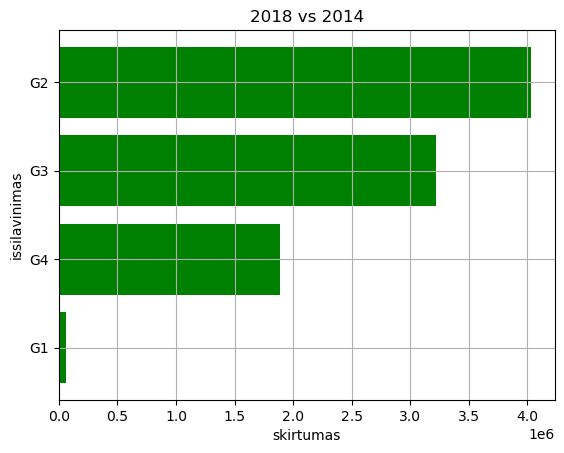

In [56]:
import matplotlib.pyplot as plt

DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
query="""
select issilavinimas, sum(case when year_ = 2018 then kiek else 0 end) - sum(case when year_= 2014 then kiek else 0 end) as skirtumas
from(
select sum(bdu_spalio)/3.4528 as kiek, issilavinimas, 2014 as year_
from DUS2014N
group by issilavinimas
union all
select sum(bdu_spalio) as kiek, issilavinimas, 2018 as year_ from DUS2018N
group by issilavinimas) as iss 
group by issilavinimas
order by skirtumas asc;
"""
C.execute(query)
results=C.fetchall()

print(f'Taip keitėsi respondentų vidutinis spalio mėnesio uždarbis (pagal išsilavinimo grupes) tarp 2014 ir 2018 metų: {results}')

C.close()
DB.close()

issilavinimas=[row[0] for row in results]
skirtumas=[row[1] for row in results]

plt.barh(issilavinimas, skirtumas, color='green' )
plt.xlabel('skirtumas')
plt.ylabel('issilavinimas')
plt.title('2018 vs 2014')
plt.grid()
plt.show()


BMW: vidutinė rida 260.48 km, vidutine kaina 30.92 €, vidutine metai: 15.00 metu.
Volkswagen: vidutinė rida 240.64 km, vidutine kaina 36.70 €, vidutine metai: 15.00 metu.
Audi: vidutinė rida 241.16 km, vidutine kaina 43.66 €, vidutine metai: 16.00 metu.
Mercedes-Benz: vidutinė rida 261.07 km, vidutine kaina 34.82 €, vidutine metai: 15.00 metu.
Toyota: vidutinė rida 201.56 km, vidutine kaina 25.68 €, vidutine metai: 14.00 metu.
(2009.0, 2009.0, 2008.0, 2009.0, 2010.0)


<function matplotlib.pyplot.show(close=None, block=None)>

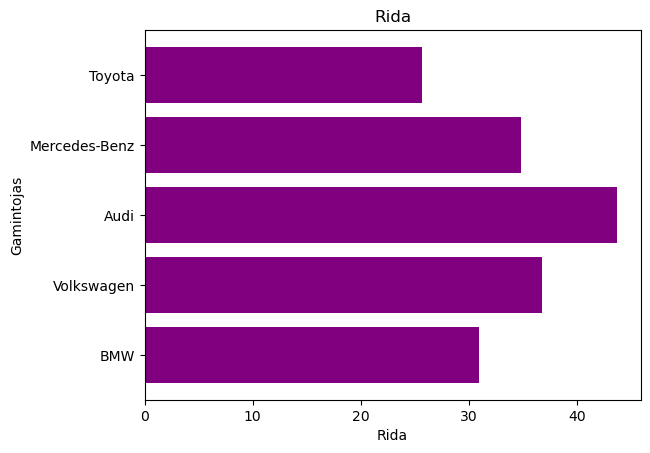

In [54]:
import matplotlib.pyplot as plt

DB = cnt.connect(
host='88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)

C = DB.cursor()
query="""
select gamintojas, count(gamintojas), avg(price), avg(rida), ceil(avg(pagaminimo_data)) from autopliuslt
group by gamintojas
order by count(gamintojas) desc
limit 5;"""

C.execute(query)
results = C.fetchall()



for row in results:
    gamintojas = row[0]
    rida = row[3]
    kaina = row[2]
    metai =2024- row[4]
    print(f"{gamintojas}: vidutinė rida {rida:.2f} km, vidutine kaina {kaina:.2f} €, vidutine metai: {metai:.2f} metu.")

gamintojas,kiek, rida,kaina,metai=zip(*results)
print(metai)
plt.figure()
plt.barh(gamintojas,rida, color='purple')
plt.xlabel('Rida')
plt.ylabel('Gamintojas')
plt.title('Rida')
plt.show

